In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns 

import re
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('questions.csv')

In [3]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
df=df.sample(30000,random_state=2)

In [5]:
df

,id,qid1,qid2,question1,question2,is_duplicate
339499,339499,665522,665523,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?,1
289521,289521,568878,568879,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...,0
4665,4665,9325,9326,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...,0
54203,54203,107861,107862,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...,1
132566,132566,262554,91499,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?,0
...,...,...,...,...,...,...
228960,228960,451205,451206,How can we earn money online in india?,How can I earn money online easily?,1
142894,142894,282812,282813,Is it possible that 0=2?,Why does zero factorial (0!) equal one (1)?,0
43027,43027,74406,85695,How do you identify a closeted gay person?,I am a closet Christian. How do I tell my gay ...,0
154198,154198,304982,304983,Can you see who views your Instagram?,Is it true that you can see who’s viewed your ...,1


### Preprocessing

In [6]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
lem=WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [10]:
def preprocess(q):
    
    q = str(q).lower().strip()
    
    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    
    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')
    
    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    
    
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()
    
    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()

    

    
    return q
    

In [11]:
df['question1']=df['question1'].apply(preprocess)
df['question2']=df['question2'].apply(preprocess)

In [12]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
339499,339499,665522,665523,why wa cyrus mistry removed a the chairman of ...,why did the tata son sacked cyrus mistry,1
289521,289521,568878,568879,by what age would you think a man should be ma...,when my wrist is extended i feel a shock and b...,0
4665,4665,9325,9326,how would an arbitrageur seek to capitalize gi...,how would an arbitrageur seek to capitalize gi...,0
54203,54203,107861,107862,why did quora mark my question a incomplete,why doe quora detect my question a an incomple...,1
132566,132566,262554,91499,what is it like working with pivotal lab a a c...,what is it like to work at pivotal lab,0


In [13]:
df['q1_len']=df['question1'].str.len()
df['q2_len']=df['question2'].str.len()

In [14]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
339499,339499,665522,665523,why wa cyrus mistry removed a the chairman of ...,why did the tata son sacked cyrus mistry,1,54,40
289521,289521,568878,568879,by what age would you think a man should be ma...,when my wrist is extended i feel a shock and b...,0,51,103
4665,4665,9325,9326,how would an arbitrageur seek to capitalize gi...,how would an arbitrageur seek to capitalize gi...,0,104,104
54203,54203,107861,107862,why did quora mark my question a incomplete,why doe quora detect my question a an incomple...,1,43,57
132566,132566,262554,91499,what is it like working with pivotal lab a a c...,what is it like to work at pivotal lab,0,51,38


In [15]:
df['q1_num_words']=df['question1'].apply(lambda row: len(row.split(" ")))
df['q2_num_words']=df['question2'].apply(lambda row: len(row.split(" ")))
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
339499,339499,665522,665523,why wa cyrus mistry removed a the chairman of ...,why did the tata son sacked cyrus mistry,1,54,40,11,8
289521,289521,568878,568879,by what age would you think a man should be ma...,when my wrist is extended i feel a shock and b...,0,51,103,11,22
4665,4665,9325,9326,how would an arbitrageur seek to capitalize gi...,how would an arbitrageur seek to capitalize gi...,0,104,104,24,24
54203,54203,107861,107862,why did quora mark my question a incomplete,why doe quora detect my question a an incomple...,1,43,57,8,10
132566,132566,262554,91499,what is it like working with pivotal lab a a c...,what is it like to work at pivotal lab,0,51,38,11,9


In [16]:
def common_words(row):
    w1=set(map(lambda word: word.lower().strip(),row['question1'].split(' ')))
    w2=set(map(lambda word: word.lower().strip(),row['question2'].split(' ')))
    return len(w1 & w2)

In [17]:
df['word_common']=df.apply(common_words,axis=1)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
339499,339499,665522,665523,why wa cyrus mistry removed a the chairman of ...,why did the tata son sacked cyrus mistry,1,54,40,11,8,6
289521,289521,568878,568879,by what age would you think a man should be ma...,when my wrist is extended i feel a shock and b...,0,51,103,11,22,3
4665,4665,9325,9326,how would an arbitrageur seek to capitalize gi...,how would an arbitrageur seek to capitalize gi...,0,104,104,24,24,18
54203,54203,107861,107862,why did quora mark my question a incomplete,why doe quora detect my question a an incomple...,1,43,57,8,10,6
132566,132566,262554,91499,what is it like working with pivotal lab a a c...,what is it like to work at pivotal lab,0,51,38,11,9,6


In [18]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

In [19]:
df['word_total'] = df.apply(total_words, axis=1)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
339499,339499,665522,665523,why wa cyrus mistry removed a the chairman of ...,why did the tata son sacked cyrus mistry,1,54,40,11,8,6,19
289521,289521,568878,568879,by what age would you think a man should be ma...,when my wrist is extended i feel a shock and b...,0,51,103,11,22,3,32
4665,4665,9325,9326,how would an arbitrageur seek to capitalize gi...,how would an arbitrageur seek to capitalize gi...,0,104,104,24,24,18,36
54203,54203,107861,107862,why did quora mark my question a incomplete,why doe quora detect my question a an incomple...,1,43,57,8,10,6,18
132566,132566,262554,91499,what is it like working with pivotal lab a a c...,what is it like to work at pivotal lab,0,51,38,11,9,6,19


In [20]:
df['word_share'] = round(df['word_common']/df['word_total'],2)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
339499,339499,665522,665523,why wa cyrus mistry removed a the chairman of ...,why did the tata son sacked cyrus mistry,1,54,40,11,8,6,19,0.32
289521,289521,568878,568879,by what age would you think a man should be ma...,when my wrist is extended i feel a shock and b...,0,51,103,11,22,3,32,0.09
4665,4665,9325,9326,how would an arbitrageur seek to capitalize gi...,how would an arbitrageur seek to capitalize gi...,0,104,104,24,24,18,36,0.50
54203,54203,107861,107862,why did quora mark my question a incomplete,why doe quora detect my question a an incomple...,1,43,57,8,10,6,18,0.33
132566,132566,262554,91499,what is it like working with pivotal lab a a c...,what is it like to work at pivotal lab,0,51,38,11,9,6,19,0.32


In [21]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'q1_len', 'q2_len', 'q1_num_words', 'q2_num_words', 'word_common',
       'word_total', 'word_share'],
      dtype='object')

In [22]:
# Advanced Features
from nltk.corpus import stopwords

def fetch_token_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features


In [23]:
token_features = df.apply(fetch_token_features, axis=1)

df["cwc_min"]       = list(map(lambda x: x[0], token_features))
df["cwc_max"]       = list(map(lambda x: x[1], token_features))
df["csc_min"]       = list(map(lambda x: x[2], token_features))
df["csc_max"]       = list(map(lambda x: x[3], token_features))
df["ctc_min"]       = list(map(lambda x: x[4], token_features))
df["ctc_max"]       = list(map(lambda x: x[5], token_features))
df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [24]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,word_total,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
339499,339499,665522,665523,why wa cyrus mistry removed a the chairman of ...,why did the tata son sacked cyrus mistry,1,54,40,11,8,...,19,0.32,0.799984,0.571420,0.666644,0.499988,0.749991,0.545450,0,1
289521,289521,568878,568879,by what age would you think a man should be ma...,when my wrist is extended i feel a shock and b...,0,51,103,11,22,...,32,0.09,0.000000,0.000000,0.499992,0.272725,0.272725,0.136363,0,0
4665,4665,9325,9326,how would an arbitrageur seek to capitalize gi...,how would an arbitrageur seek to capitalize gi...,0,104,104,24,24,...,36,0.50,0.999992,0.999992,0.999980,0.999980,0.749997,0.749997,1,1
54203,54203,107861,107862,why did quora mark my question a incomplete,why doe quora detect my question a an incomple...,1,43,57,8,10,...,18,0.33,0.749981,0.499992,0.749981,0.749981,0.749991,0.599994,0,1
132566,132566,262554,91499,what is it like working with pivotal lab a a c...,what is it like to work at pivotal lab,0,51,38,11,9,...,19,0.32,0.749981,0.599988,0.599988,0.599988,0.666659,0.545450,0,1


In [25]:
!pip install distance


In [26]:
import distance

def fetch_length_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    # length of longest common substrings
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features
    

In [27]:
length_features = df.apply(fetch_length_features, axis=1)

df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
df['mean_len'] = list(map(lambda x: x[1], length_features))
df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [28]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio
339499,339499,665522,665523,why wa cyrus mistry removed a the chairman of ...,why did the tata son sacked cyrus mistry,1,54,40,11,8,...,0.571420,0.666644,0.499988,0.749991,0.545450,0,1,3,9.5,0.317073
289521,289521,568878,568879,by what age would you think a man should be ma...,when my wrist is extended i feel a shock and b...,0,51,103,11,22,...,0.000000,0.499992,0.272725,0.272725,0.136363,0,0,11,16.5,0.115385
4665,4665,9325,9326,how would an arbitrageur seek to capitalize gi...,how would an arbitrageur seek to capitalize gi...,0,104,104,24,24,...,0.999992,0.999980,0.999980,0.749997,0.749997,1,1,0,24.0,0.990476
54203,54203,107861,107862,why did quora mark my question a incomplete,why doe quora detect my question a an incomple...,1,43,57,8,10,...,0.499992,0.749981,0.749981,0.749991,0.599994,0,1,2,9.0,0.340909
132566,132566,262554,91499,what is it like working with pivotal lab a a c...,what is it like to work at pivotal lab,0,51,38,11,9,...,0.599988,0.599988,0.599988,0.666659,0.545450,0,1,2,10.0,0.410256


In [29]:
!pip install fuzzywuzzy

In [30]:
# Fuzzy Features
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [31]:
fuzzy_features = df.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [32]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
339499,339499,665522,665523,why wa cyrus mistry removed a the chairman of ...,why did the tata son sacked cyrus mistry,1,54,40,11,8,...,0.545450,0,1,3,9.5,0.317073,38,45,68,84
289521,289521,568878,568879,by what age would you think a man should be ma...,when my wrist is extended i feel a shock and b...,0,51,103,11,22,...,0.136363,0,0,11,16.5,0.115385,26,50,35,37
4665,4665,9325,9326,how would an arbitrageur seek to capitalize gi...,how would an arbitrageur seek to capitalize gi...,0,104,104,24,24,...,0.749997,1,1,0,24.0,0.990476,100,100,100,100
54203,54203,107861,107862,why did quora mark my question a incomplete,why doe quora detect my question a an incomple...,1,43,57,8,10,...,0.599994,0,1,2,9.0,0.340909,74,74,74,88
132566,132566,262554,91499,what is it like working with pivotal lab a a c...,what is it like to work at pivotal lab,0,51,38,11,9,...,0.545450,0,1,2,10.0,0.410256,76,84,79,85


In [ ]:
print(df.shape)

(30000, 28)


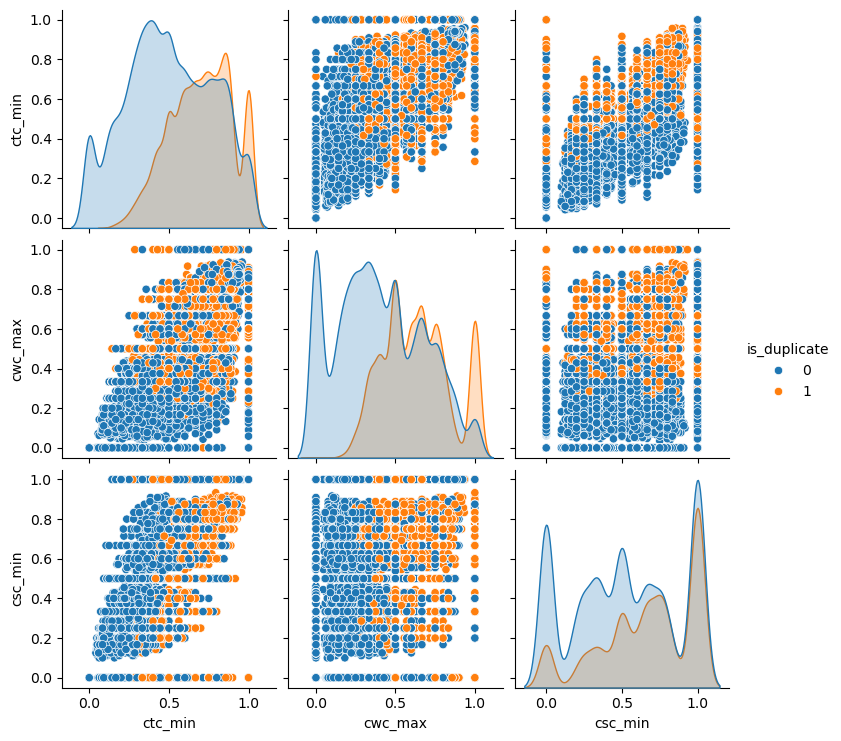

In [ ]:
sns.pairplot(df[['ctc_min','cwc_max','csc_min','is_duplicate']],hue='is_duplicate')

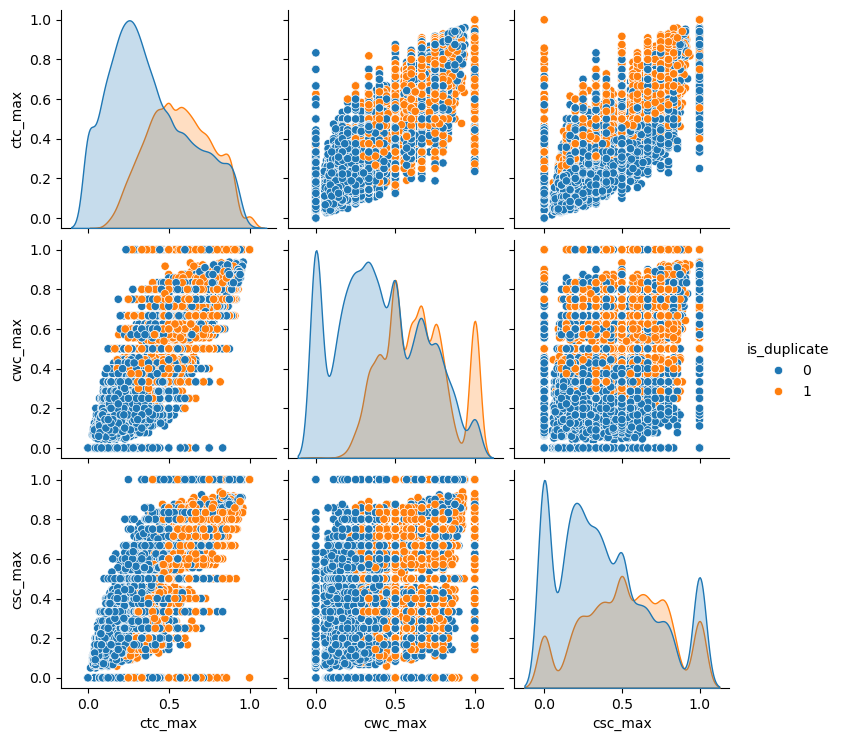

In [ ]:
sns.pairplot(df[['ctc_max', 'cwc_max', 'csc_max', 'is_duplicate']],hue='is_duplicate')

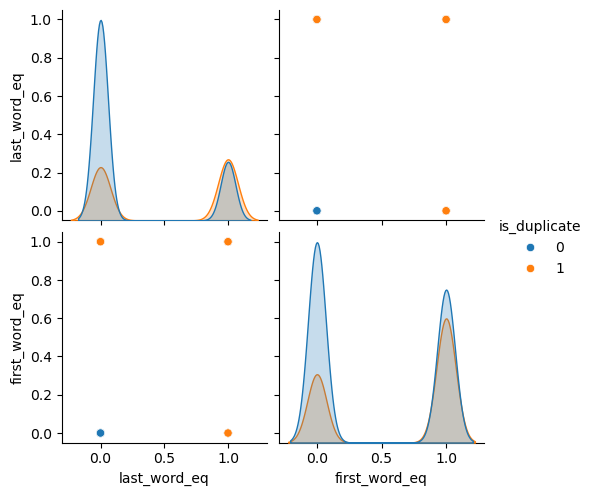

In [ ]:
sns.pairplot(df[['last_word_eq','first_word_eq','is_duplicate']],hue='is_duplicate')

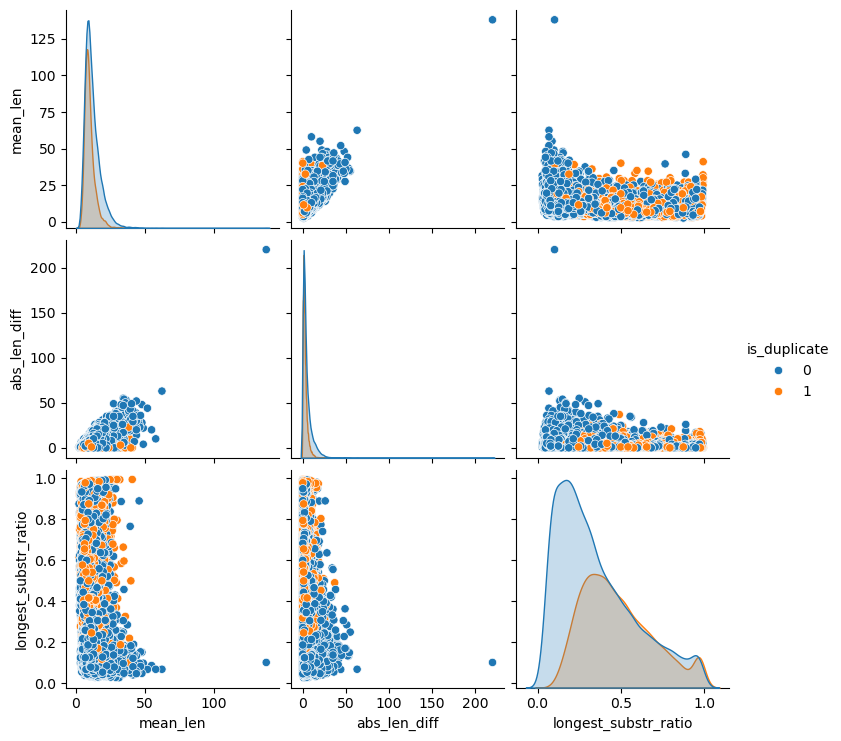

In [ ]:
sns.pairplot(df[['mean_len', 'abs_len_diff','longest_substr_ratio', 'is_duplicate']],hue='is_duplicate')

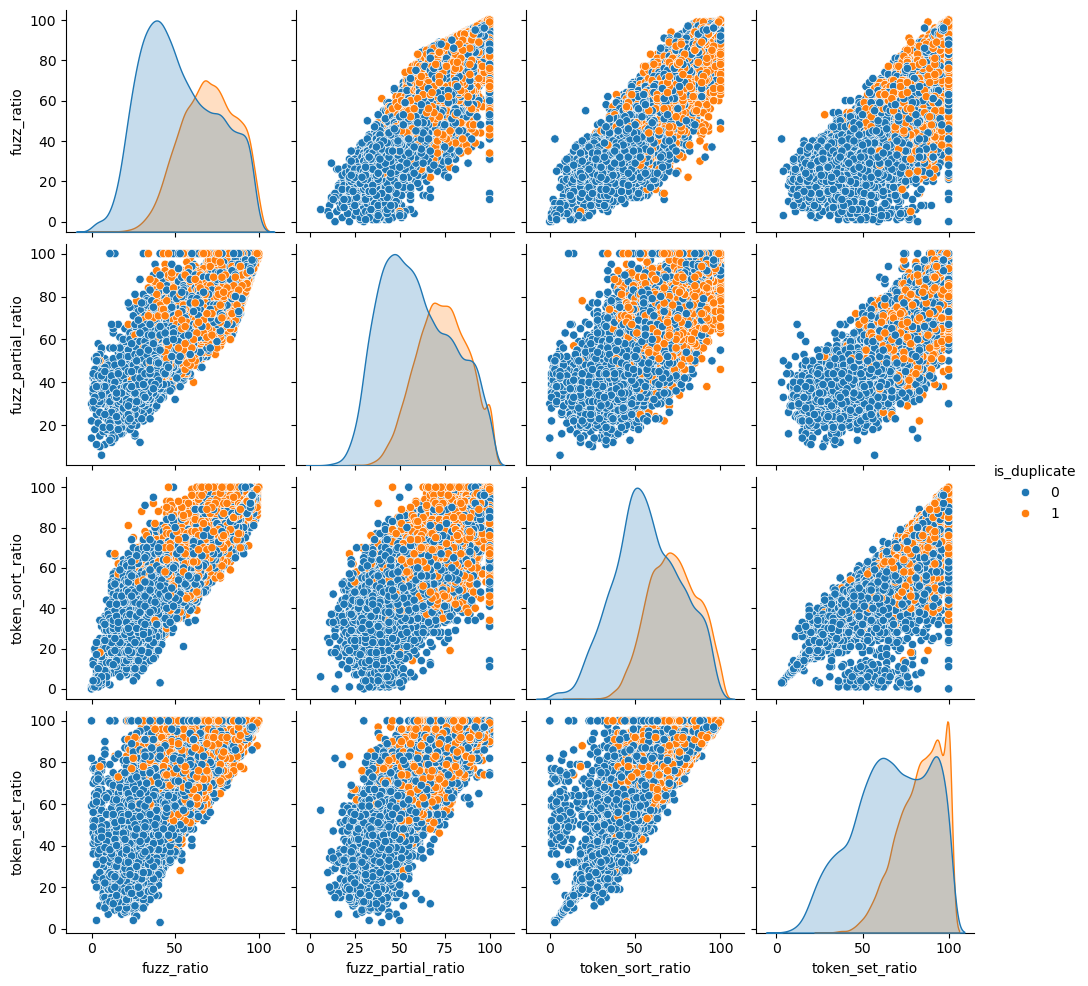

In [ ]:
sns.pairplot(df[['fuzz_ratio', 'fuzz_partial_ratio','token_sort_ratio','token_set_ratio', 'is_duplicate']],hue='is_duplicate')

In [ ]:
# Using TSNE for Dimentionality reduction for 15 Features(Generated after cleaning the data) to 3 dimention

from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(df[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']])
y = df['is_duplicate'].values

In [ ]:
from sklearn.manifold import TSNE

tsne2d = TSNE(
    n_components=2,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    verbose=2,
    angle=0.5
).fit_transform(X)

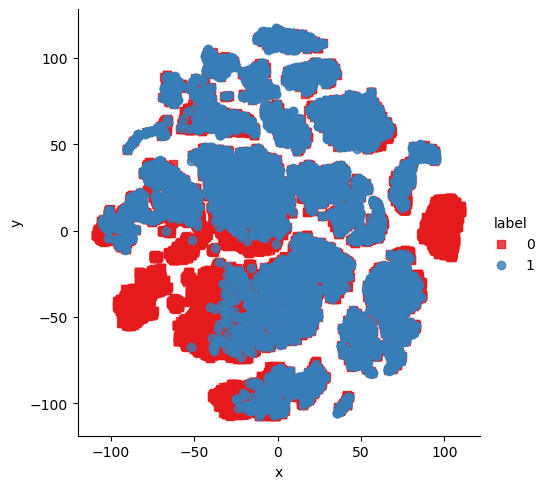

In [ ]:
x_df = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})

# draw the plot in appropriate place in the grid
sns.lmplot(data=x_df, x='x', y='y', hue='label', fit_reg=False,palette="Set1",markers=['s','o'])


In [33]:
ques_df=df[['question1','question2']]
ques_df.head()

,question1,question2
339499,why wa cyrus mistry removed a the chairman of ...,why did the tata son sacked cyrus mistry
289521,by what age would you think a man should be ma...,when my wrist is extended i feel a shock and b...
4665,how would an arbitrageur seek to capitalize gi...,how would an arbitrageur seek to capitalize gi...
54203,why did quora mark my question a incomplete,why doe quora detect my question a an incomple...
132566,what is it like working with pivotal lab a a c...,what is it like to work at pivotal lab


In [34]:
final_df = df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 23)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
339499,1,54,40,11,8,6,19,0.32,0.799984,0.571420,...,0.545450,0,1,3,9.5,0.317073,38,45,68,84
289521,0,51,103,11,22,3,32,0.09,0.000000,0.000000,...,0.136363,0,0,11,16.5,0.115385,26,50,35,37
4665,0,104,104,24,24,18,36,0.50,0.999992,0.999992,...,0.749997,1,1,0,24.0,0.990476,100,100,100,100
54203,1,43,57,8,10,6,18,0.33,0.749981,0.499992,...,0.599994,0,1,2,9.0,0.340909,74,74,74,88
132566,0,51,38,11,9,6,19,0.32,0.749981,0.599988,...,0.545450,0,1,2,10.0,0.410256,76,84,79,85


In [35]:
final_df.columns

Index(['is_duplicate', 'q1_len', 'q2_len', 'q1_num_words', 'q2_num_words',
       'word_common', 'word_total', 'word_share', 'cwc_min', 'cwc_max',
       'csc_min', 'csc_max', 'ctc_min', 'ctc_max', 'last_word_eq',
       'first_word_eq', 'abs_len_diff', 'mean_len', 'longest_substr_ratio',
       'fuzz_ratio', 'fuzz_partial_ratio', 'token_sort_ratio',
       'token_set_ratio'],
      dtype='object')

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(
    ngram_range=(1, 2),        
    max_features=3000,         
    min_df=2,                  
    max_df=0.9,                
    stop_words='english',      
    lowercase=True,            
)

q1_arr, q2_arr = np.vsplit(
    cv.fit_transform(questions).toarray(), 
    2
)


In [37]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [38]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(30000, 6023)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
339499,1,54,40,11,8,6,19,0.32,0.799984,0.571420,...,0,0,0,0,0,0,0,0,0,0
289521,0,51,103,11,22,3,32,0.09,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
4665,0,104,104,24,24,18,36,0.50,0.999992,0.999992,...,0,0,0,0,0,0,0,0,0,0
54203,1,43,57,8,10,6,18,0.33,0.749981,0.499992,...,0,0,0,0,0,0,0,0,0,0
132566,0,51,38,11,9,6,19,0.32,0.749981,0.599988,...,0,0,0,0,0,0,0,0,0,0


In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score


In [42]:
'''models = {
    "Naive bayes": MultinomialNB(alpha=0.5,fit_prior=True),
    "Logistic Regression": LogisticRegression(max_iter=3000, n_jobs=-1),
    "Linear SVM": LinearSVC(),
    "Random Forest": RandomForestClassifier(
        n_estimators=300,
        max_depth=15,
        n_jobs=-1,
        random_state=42
    ),
    "XGBoost": XGBClassifier(
        n_estimators=300,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric='logloss'
    )
}

trained_models = {}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    acc = accuracy_score(y_test, preds)
    f1  = f1_score(y_test, preds)

    results.append((name, acc, f1))
    trained_models[name] = model   ''' 

from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred1 = xgb.predict(X_test)
accuracy_score(y_test,y_pred1)


0.7805

In [ ]:
import pandas as pd

results_df = pd.DataFrame(
    results,
    columns=['Model', 'Accuracy', 'F1 Score']
).sort_values(by='F1 Score', ascending=False)

results_df


,Model,Accuracy,F1 Score
4,XGBoost,0.785833,0.702753
1,Logistic Regression,0.770333,0.675765
2,Linear SVM,0.751000,0.658592
0,Naive bayes,0.669333,0.632593
3,Random Forest,0.748167,0.608042


In [ ]:
'''from xgboost import XGBClassifier
from sklearn.metrics import f1_score, accuracy_score
import pickle

param_list = [
    {"max_depth": 4, "n_estimators": 300, "learning_rate": 0.1},
    {"max_depth": 4, "n_estimators": 500, "learning_rate": 0.05},
    {"max_depth": 5, "n_estimators": 300, "learning_rate": 0.1},
    {"max_depth": 3, "n_estimators": 500, "learning_rate": 0.1},
]

best_f1 = 0
best_acc = 0
best_model = None
best_params = None

for params in param_list:
    model = XGBClassifier(
        objective="binary:logistic",
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric="logloss",
        n_jobs=4,
        random_state=42,
        **params
    )
    
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    f1 = f1_score(y_test, preds)
    acc = accuracy_score(y_test, preds)
    
    print(f"Params: {params} | F1: {f1:.4f} | Acc: {acc:.4f}")
    
    if f1 > best_f1:
        best_f1 = f1
        best_acc = acc
        best_model = model
        best_params = params

print("\n================ FINAL BEST MODEL ================")
print("Best Params :", best_params)
print("Best F1     :", round(best_f1, 4))
print("Best Acc    :", round(best_acc, 4))'''


In [44]:
cv


,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None
,stop_words,'english'
,token_pattern,'(?u)\\b\\w\\w+\\b'
,ngram_range,"(1, ...)"
,analyzer,'word'


In [45]:
import pickle

pickle.dump(xgb,open('model.pkl','wb'))
pickle.dump(cv,open('cv.pkl','wb'))